In [1]:
import numpy as np
import matplotlib.pyplot as plt

import figurefirst
import fly_plot_lib.plot as fpl
import fly_plot_lib.text as flytext
from IPython.display import display,SVG

1.5.1
recommended version: 1.1.1 or greater


In [2]:
tags = [1.7, 5, 15]
for tag in tags:
    tag = str(tag)
figurefirst.regenerate.clear_fifidata('supp_fig_4_data.dillpickle', ('model', tag))

In [3]:
# attraction is concentration dependent

def attraction_time_f(concentration):
    if concentration == 1.7/100.:
        return 2*60
    if concentration == 5/100.:
        return 2*60
    if concentration == 15/100.:
        return 0.5*60

In [4]:
aversion_time = 30*60
k = 0.08 # proportionality constant that determines probability of detecting CO2 each second

In [5]:
# This function determines the state of the agent based on its previous few states, and CO2 concentration

def propagate(state, co2, concentration):
    attraction_time = int(attraction_time_f(concentration))
    if co2:
        if int(state[-1]) == 0:
            if np.random.uniform(0,1) < k*concentration:
                state.append(1)
            else:
                state.append(0)
        elif int(state[-1]) == 1:
            if np.sum((state[-1*attraction_time:])) >= attraction_time:
                state.append(-1)
            else:
                state.append(1)
        elif int(state[-1]) == -1:
            if np.sum((state[-1*aversion_time:])) <= -1*aversion_time:
                state.append(0)
            else:
                state.append(-1)
    else:
        if int(state[-1]) == 0:
            state.append(0)
        elif int(state[-1]) == 1:
            if np.sum((state[-1*attraction_time:])) >= attraction_time:
                state.append(-1)
            else:
                state.append(0)
        elif int(state[-1]) == -1:
            if np.sum((state[-1*aversion_time:])) <= -1*aversion_time:
                state.append(0)
            else:
                state.append(-1)
    return state

In [6]:
def sim(concentration):
    
    # start with 10 min no odor (noise injected for plotting purposes)
    state = [np.random.uniform(-0.35,0.35) for i in range(10*60)]

    # 10 min of CO2 presentation
    for i in range(10*60):
        state = propagate(state, 1, concentration)

    # 10 min of clean air
    for i in range(10*60):
        state = propagate(state, 0, concentration)
    
    return state

In [7]:
# bootstrapping confidence intervals for plotting

def get_one_bootstrapped_mean(data):
    indices = np.random.randint(0, len(data), len(data))
    selection = [data[i] for i in indices]
    return np.mean(selection, axis=0)   

def get_95_confidence_intervals(data, iterations=100):
    bootstrapped_data = np.mean(data, axis=0)
    for iteration in range(iterations):
        bootstrapped_data = np.vstack( (bootstrapped_data, get_one_bootstrapped_mean(data)) )
    bootstrapped_data.sort(axis=0)
    
    index_hi = int(iterations*0.975)
    index_lo = int(iterations*0.025)
    
    return bootstrapped_data[index_lo, :], bootstrapped_data[index_hi, :]

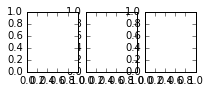

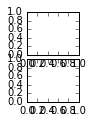

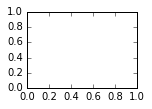

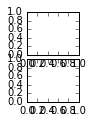

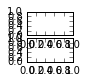

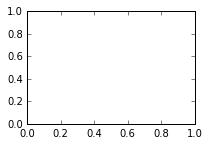

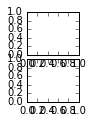

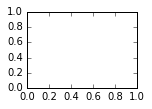

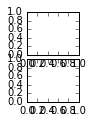

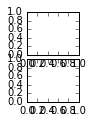

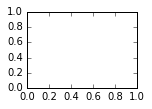

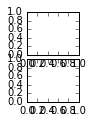

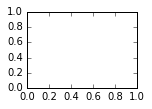

In [8]:
layout = figurefirst.svg_to_axes.FigureLayout('supp_fig_4.svg') 
layout.make_mplfigures()

In [9]:
concentration = 5/100.

In [10]:
def plot_model_for_concentration(concentration):
    concentration_percent = concentration / 100.
    states = [sim(concentration_percent) for i in range(100)]
    states = np.array(states)

    ax = layout.axes[('model', str(concentration))]

    m = np.mean(states, axis=0)
    x = np.arange(0,len(m),1)

    lo, hi = get_95_confidence_intervals(states, iterations=100)

    ax._fill_between([], x, lo, hi, facecolor='white', 
                    alpha=0.2, edgecolor='none', zorder=0)
    ax._fill_between(['Simulated preference index confidence interval concentration: '+str(concentration)+'percent',
                      'Sim time', '2.5 perc CI', '97.5 perc CI'], 
                      x, lo, hi, facecolor=(0.001, 0.001, 0.001), 
                      alpha=0.2, edgecolor='none', zorder=-1)

    ax._custom(['Simulated preference index mean (colored)', 'Sim time', 'Mean Pref Ind', 'Color (mean pref ind)'],
                'fly_plot_lib.plot.colorline',
                x, 
                m, 
                m,
                cmap='seismic',
                norm=[-0.7, 0.7],
                zorder=1)

    ax.record = True
    ax.set_ylim(-1, 1)
    ax.set_xlim(0,1800)
    ax.fill_between([600,1200], -1,1, facecolor='green', edgecolor='none', alpha=0.3, zorder=-10)
    ax.set_rasterization_zorder(0)
    ax.adjust_spines([])
    ax.set_ylim(-1,1)
    ax.record = False

In [11]:
plot_model_for_concentration(1.7)
plot_model_for_concentration(5)
plot_model_for_concentration(15)

[[[ 0.00000000e+00 -3.12108516e-02]
  [ 1.00000000e+00  1.03167501e-02]]

 [[ 1.00000000e+00  1.03167501e-02]
  [ 2.00000000e+00  2.13193131e-02]]

 [[ 2.00000000e+00  2.13193131e-02]
  [ 3.00000000e+00 -5.15121675e-03]]

 ...

 [[ 1.79600000e+03 -5.10000000e-01]
  [ 1.79700000e+03 -5.10000000e-01]]

 [[ 1.79700000e+03 -5.10000000e-01]
  [ 1.79800000e+03 -5.10000000e-01]]

 [[ 1.79800000e+03 -5.10000000e-01]
  [ 1.79900000e+03 -5.10000000e-01]]]
[[[ 0.00000000e+00 -1.77848875e-02]
  [ 1.00000000e+00 -1.43237635e-03]]

 [[ 1.00000000e+00 -1.43237635e-03]
  [ 2.00000000e+00  1.68824662e-02]]

 [[ 2.00000000e+00  1.68824662e-02]
  [ 3.00000000e+00 -1.96765477e-02]]

 ...

 [[ 1.79600000e+03 -8.50000000e-01]
  [ 1.79700000e+03 -8.50000000e-01]]

 [[ 1.79700000e+03 -8.50000000e-01]
  [ 1.79800000e+03 -8.50000000e-01]]

 [[ 1.79800000e+03 -8.50000000e-01]
  [ 1.79900000e+03 -8.50000000e-01]]]
[[[ 0.00000000e+00 -1.23306765e-02]
  [ 1.00000000e+00 -2.52317876e-02]]

 [[ 1.00000000e+00 -2.5231

In [14]:
layout.axes[('model', '5')]._set_fontsize([], 6)

layout.append_figure_to_layer(layout.figures['model'], 'model', cleartarget=True)
layout.write_svg('supp_fig_4.svg')

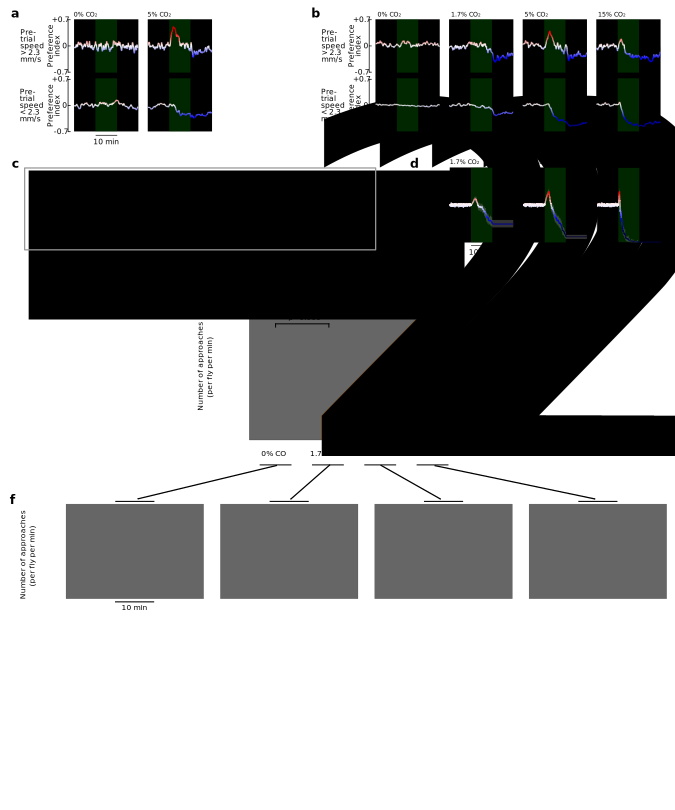

In [15]:
display(SVG('supp_fig_4.svg'))